In [24]:
#Activate the virtual environment
#Run in the terminal : venv/Scripts/activate
#And then run
!pip install ipykernel
!python -m ipykernel install --user --name=venv --display-name "Python (venv)"

#Install the required packages for the project
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec venv in /root/.local/share/jupyter/kernels/venv
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec venv in /root/.local/share/jupyter/kernels/venv
ERROR: Could not open requirements file: [Errno 2] No such file or directory

In [23]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPolygon
from tqdm import tqdm
import gdown
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected= True)
import plotly.express as px

In [2]:
import seaborn as sns
import scipy as sp

In [25]:
import time
import statsmodels.formula.api as sm
import statsmodels

In [26]:
pd.set_option('display.max_columns', None)

In [27]:
file_id = "1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Download the file
gdown.download(url, "FD_SALAAN_2021.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL
From (redirected): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL&confirm=t&uuid=1d592946-6ed3-4cec-bd5f-0e65edad2c96
To: /content/FD_SALAAN_2021.csv
100%|██████████| 230M/230M [00:03<00:00, 67.3MB/s]


'FD_SALAAN_2021.csv'

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL
From (redirected): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL&confirm=t&uuid=e57d0852-d445-4200-8d57-c55dde066c3d
To: /content/FD_SALAAN_2021.csv
100%|██████████| 230M/230M [00:02<00:00, 81.4MB/s]


'FD_SALAAN_2021.csv'

In [28]:
base = pd.read_csv("FD_SALAAN_2021.csv", delimiter=";")

<ipython-input-6-158472014e1f>:1: DtypeWarning:

Columns (0,1,3,24) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-28-158472014e1f>:1: DtypeWarning:

Columns (0,1,3,24) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
base2 = pd.read_csv("INSEE_DATA_TREATED.csv")

PICO stands for
 • Population : Who are we interested in? : all French population in 2021 (all employed French population ?)
 • Intervention : What treatment/intervention do we study? : do we find a specific treatment ? related to sex/geography/PCS? determined by lasso selection ?
 • Comparison : What are we comparing it to? depends on the treatment
 •Outcome : What are we interested in? wages

### Treatment of the data

In [29]:
base.columns

Index(['A6', 'A17', 'A38', 'CPFD', 'DATDEB', 'DATFIN', 'DEPR', 'DEPT',
       'DOMEMPL', 'DOMEMPL_EM', 'DUREE', 'FILT', 'REGR', 'REGT', 'SEXE', 'PCS',
       'TYP_EMPLOI', 'CONV_COLL', 'NBHEUR', 'NBHEUR_TOT', 'AGE', 'TRNNETO',
       'TRALCHT', 'TREFF', 'CONT_TRAV', 'CS', 'AGE_TR', 'DATDEB_TR',
       'DATFIN_TR', 'DUREE_TR', 'POND'],
      dtype='object')

Index(['A6', 'A17', 'A38', 'CPFD', 'DATDEB', 'DATFIN', 'DEPR', 'DEPT',
       'DOMEMPL', 'DOMEMPL_EM', 'DUREE', 'FILT', 'REGR', 'REGT', 'SEXE', 'PCS',
       'TYP_EMPLOI', 'CONV_COLL', 'NBHEUR', 'NBHEUR_TOT', 'AGE', 'TRNNETO',
       'TRALCHT', 'TREFF', 'CONT_TRAV', 'CS', 'AGE_TR', 'DATDEB_TR',
       'DATFIN_TR', 'DUREE_TR', 'POND'],
      dtype='object')

In [30]:
base.describe()

,DATDEB,DATFIN,DOMEMPL,DOMEMPL_EM,DUREE,FILT,REGR,REGT,SEXE,CONV_COLL,NBHEUR,NBHEUR_TOT,AGE,TRNNETO,TRALCHT,TREFF,CS,AGE_TR,DATDEB_TR,DATFIN_TR,DUREE_TR,POND
count,2.315884e+06,2.315888e+06,2.315882e+06,2.315880e+06,2.315888e+06,2.403775e+06,2.403085e+06,2.403552e+06,2.403775e+06,1.823112e+06,2.315888e+06,2.403775e+06,2.403773e+06,2.403775e+06,2.403775e+06,2.315888e+06,2.403770e+06,2.403773e+06,2.315884e+06,2.315885e+06,2.315888e+06,2403775.0
mean,3.536017e+01,3.350661e+02,7.281775e+00,7.234558e+00,2.949483e+02,1.036562e+00,4.798204e+01,4.718156e+01,1.487933e+00,1.893209e+03,1.376363e+03,1.439326e+03,4.031458e+01,1.418324e+01,8.685731e+01,3.460505e+00,5.149241e+01,4.301459e+01,2.073556e+00,1.122610e+01,9.947387e+00,12.0
std,7.530344e+01,5.875425e+01,2.896169e+00,2.952704e+00,1.011707e+02,1.876841e-01,2.965864e+01,2.989181e+01,4.998545e-01,1.665718e+03,5.692307e+02,5.982207e+02,1.307155e+01,5.424315e+00,3.136699e+01,1.989165e+00,1.052402e+01,1.303522e+01,2.401663e+00,1.879045e+00,3.231859e+00,0.0
min,-3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,-1.200000e+01,1.000000e+00,1.000000e+00,12.0
25%,1.000000e+00,3.600000e+02,7.000000e+00,7.000000e+00,2.400000e+02,1.000000e+00,2.400000e+01,1.100000e+01,1.000000e+00,9.920000e+02,9.150000e+02,1.020000e+03,2.900000e+01,1.000000e+01,9.900000e+01,1.000000e+00,4.300000e+01,3.100000e+01,1.000000e+00,1.200000e+01,8.000000e+00,12.0
50%,1.000000e+00,3.600000e+02,9.000000e+00,9.000000e+00,3.600000e+02,1.000000e+00,4.400000e+01,4.400000e+01,1.000000e+00,1.597000e+03,1.644000e+03,1.741000e+03,4.000000e+01,1.400000e+01,9.900000e+01,3.000000e+00,5.400000e+01,4.300000e+01,1.000000e+00,1.200000e+01,1.200000e+01,12.0
75%,1.000000e+00,3.600000e+02,9.000000e+00,9.000000e+00,3.600000e+02,1.000000e+00,7.600000e+01,7.600000e+01,2.000000e+00,2.336000e+03,1.820000e+03,1.820000e+03,5.100000e+01,1.900000e+01,9.900000e+01,6.000000e+00,6.200000e+01,5.500000e+01,1.000000e+00,1.200000e+01,1.200000e+01,12.0
max,3.600000e+02,4.950000e+02,9.000000e+00,9.000000e+00,3.600000e+02,2.000000e+00,9.900000e+01,9.900000e+01,2.000000e+00,9.999000e+03,2.500000e+03,3.000000e+03,1.210000e+02,2.300000e+01,9.900000e+01,6.000000e+00,6.900000e+01,7.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.0


,DATDEB,DATFIN,DOMEMPL,DOMEMPL_EM,DUREE,FILT,REGR,REGT,SEXE,CONV_COLL,NBHEUR,NBHEUR_TOT,AGE,TRNNETO,TRALCHT,TREFF,CS,AGE_TR,DATDEB_TR,DATFIN_TR,DUREE_TR,POND
count,2.315884e+06,2.315888e+06,2.315882e+06,2.315880e+06,2.315888e+06,2.403775e+06,2.403085e+06,2.403552e+06,2.403775e+06,1.823112e+06,2.315888e+06,2.403775e+06,2.403773e+06,2.403775e+06,2.403775e+06,2.315888e+06,2.403770e+06,2.403773e+06,2.315884e+06,2.315885e+06,2.315888e+06,2403775.0
mean,3.536017e+01,3.350661e+02,7.281775e+00,7.234558e+00,2.949483e+02,1.036562e+00,4.798204e+01,4.718156e+01,1.487933e+00,1.893209e+03,1.376363e+03,1.439326e+03,4.031458e+01,1.418324e+01,8.685731e+01,3.460505e+00,5.149241e+01,4.301459e+01,2.073556e+00,1.122610e+01,9.947387e+00,12.0
std,7.530344e+01,5.875425e+01,2.896169e+00,2.952704e+00,1.011707e+02,1.876841e-01,2.965864e+01,2.989181e+01,4.998545e-01,1.665718e+03,5.692307e+02,5.982207e+02,1.307155e+01,5.424315e+00,3.136699e+01,1.989165e+00,1.052402e+01,1.303522e+01,2.401663e+00,1.879045e+00,3.231859e+00,0.0
min,-3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,-1.200000e+01,1.000000e+00,1.000000e+00,12.0
25%,1.000000e+00,3.600000e+02,7.000000e+00,7.000000e+00,2.400000e+02,1.000000e+00,2.400000e+01,1.100000e+01,1.000000e+00,9.920000e+02,9.150000e+02,1.020000e+03,2.900000e+01,1.000000e+01,9.900000e+01,1.000000e+00,4.300000e+01,3.100000e+01,1.000000e+00,1.200000e+01,8.000000e+00,12.0
50%,1.000000e+00,3.600000e+02,9.000000e+00,9.000000e+00,3.600000e+02,1.000000e+00,4.400000e+01,4.400000e+01,1.000000e+00,1.597000e+03,1.644000e+03,1.741000e+03,4.000000e+01,1.400000e+01,9.900000e+01,3.000000e+00,5.400000e+01,4.300000e+01,1.000000e+00,1.200000e+01,1.200000e+01,12.0
75%,1.000000e+00,3.600000e+02,9.000000e+00,9.000000e+00,3.600000e+02,1.000000e+00,7.600000e+01,7.600000e+01,2.000000e+00,2.336000e+03,1.820000e+03,1.820000e+03,5.100000e+01,1.900000e+01,9.900000e+01,6.000000e+00,6.200000e+01,5.500000e+01,1.000000e+00,1.200000e+01,1.200000e+01,12.0
max,3.600000e+02,4.950000e+02,9.000000e+00,9.000000e+00,3.600000e+02,2.000000e+00,9.900000e+01,9.900000e+01,2.000000e+00,9.999000e+03,2.500000e+03,3.000000e+03,1.210000e+02,2.300000e+01,9.900000e+01,6.000000e+00,6.900000e+01,7.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12.0


In [31]:
numerical_columns = [
    'DATDEB', 'DATFIN', #date début et fin de rémunération par rapport au 01/01
     'AGE', #age en années
     'POND', #pondération 1/12e
    'DUREE', #durée de paie en jours
      'NBHEUR', 'NBHEUR_TOT', #nombre d'heures salariées total (quelle diff?)
    'WAGE', #transformation of TRNNETO
    'UNEMP' #transformation of TRALCHT
]
categorical_columns = [
    'A6', 'A17', 'A38' #activité en nomenclature agrégrée
    'CPFD', #temps complet ou partiel
    'DEPR', 'DEPT', #département résidence et travail
    'DOMEMPL', 'DOMEMPL_EM', #domaine de l'emploi et l'établissement d'affectation/employeur

    'FILT', #indic poste annexe 2 ou non-annexe 1 (seuils rémunération volume)
    'REGR', 'REGT', #région de résidence et de travail
    'SEXE', #1 homme 2 femme
    'PCS', #PCS-ESE
    'TYP_EMPLOI', #ordinaire, apprenti, autre
    'CONV_COLL', #convention collective

    'TRNNETO', #rémunération nette globale en tranches -> à passer en numérique ?
    'TRALCHT', #total des indémnités de chômage, en tranches -> passage en numérique ?
    'TREFF', #tranche d'effectif : de 0 à 250+ postes
    'CONT_TRAV', #contrat de travail : APP apprentissage, TOA occasionnel ou à l'acte, TTP intérim, AUTre
    'CS', #CSP mais code plus simple
    'AGE_TR', #age en tranches quadriennales
    'DATDEB_TR',
       'DATFIN_TR', #dates début et fin rémunération en tranches
    'DUREE_TR', #durée de paie exprimée en jours en tranches mensuelles
]

### Changing the names of some categorical variables

In [32]:
#domaine d'emploi

code_to_name = {
    1 : "Fonction Publique d'Etat",
    2 : 'Fonction Publique Territoriale',
    3 : 'Fonction Publique Hospitalière',
    4 : 'Autres Organismes Publics Administratifs',
    5 : "Personnes morales de droit public soumises au droit commercial",
6 : "Entreprises individuelles",
7 : "Particuliers Employeurs",
8 : "Organismes privés spécialisés et groupements de droit privé",
9 : "Autres sociétés privées"
}

base['DOMEMPL_EM_N'] = base['DOMEMPL_EM'].replace(code_to_name)

base['DOMEMPL_N'] = base['DOMEMPL'].replace(code_to_name)

In [33]:
code_to_name_reg = {
    1 : "Guadeloupe",
2 :"Martinique",
3 : "Guyane",
4 : "Réunion",
11 : "Île-de-France",
24 : "Centre-Val de Loire",
27 : "Bourgogne – Franche-Comté",
28 : "Normandie",
32 : "Nord – Pas-de-Calais – Picardie",
44 : "Alsace – Champagne-Ardenne - Lorraine",
52 : "Pays de la Loire",
53 : "Bretagne",
75 : "Aquitaine – Limousin – Poitou-Charentes",
76 : "Languedoc-Roussillon – Midi-Pyrénées",
84 : "Auvergne – Rhône-Alpes",
93 : "Provence-Alpes-Côte d'Azur",
94 : "Corse",
99 : "Étranger et TOM"}

base['REGR_N'] = base['REGR'].replace(code_to_name_reg)
base['REGT_N'] = base['REGT'].replace(code_to_name_reg)

In [34]:
code_to_name_CS = {
   10 : "Agriculteurs (salariés de leur exploitation)",
21 : "Artisans (salariés de leur entreprise)",
22 : "Commerçants et assimilés (salariés de leur entreprise)",
23 : "Chefs d'entreprise de 10 salariés ou plus (salariés de leur entreprise)",
31 : "Professions libérales (exercées sous statut de salarié)",
33 : "Cadres de la fonction publique",
34 : "Professeurs, professions scientifiques",
35 : "Professions de l'information, des arts et des spectacles",
37 : "Cadres administratifs et commerciaux d'entreprises",
38 : "Ingénieurs et cadres techniques d'entreprises",
42 : "Professeurs des écoles, instituteurs et professions assimilées",
43 : "Professions intermédiaires de la santé et du travail social",
44 : "Clergé, religieux",
45 : "Professions intermédiaires administratives de la fonction publique",
46 : "Professions intermédiaires administratives et commerciales des entreprises",
47 : "Techniciens (sauf techniciens tertiaires)",
48 : "Contremaîtres, agents de maîtrise (maîtrise administrative exclue)",
52 : "Employés civils et agents de service de la fonction publique",
53 : "Agents de surveillance",
54 : "Employés administratifs d'entreprise",
55 : "Employés de commerce",
56 : "Personnels des services directs aux particuliers",
62 : "Ouvriers qualifiés de type industriel",
63 : "Ouvriers qualifiés de type artisanal",
64 : "Chauffeurs",
65 : "Ouvriers qualifiés de la manutention, du magasinage et du transport",
67 : "Ouvriers non qualifiés de type industriel",
68 : "Ouvriers non qualifiés de type artisanal",
69 : "Ouvriers agricoles et assimilés"}

base['CS_N'] = base['CS'].replace(code_to_name_CS)

In [35]:
base['PCS'].describe()

,PCS
count,2403770
unique,429
top,621F
freq,63194


,PCS
count,2403770
unique,429
top,621F
freq,63194


In [36]:
base['SEXE'].value_counts()

,count
SEXE,
1,1230895
2,1172880


,count
SEXE,
1,1230895
2,1172880


# Change dept in int before replacing

In [37]:
base['DEPR'].convert_dtypes()
base['DEPT'].convert_dtypes()

,DEPT
0,49
1,35
2,59
3,62
4,66
...,...
2403770,36
2403771,36
2403772,36
2403773,36


,DEPT
0,49
1,35
2,59
3,62
4,66
...,...
2403770,36
2403771,36
2403772,36
2403773,36


In [38]:
code_to_name_dep = {
    "01" : "Ain",
"02" : "Aisne",
"03" : "Allier",
"04" : "Alpes-de-Haute-Provence",
"05" : "Hautes-Alpes",
"06" : "Alpes-Maritimes",
"07" : "Ardèche",
"08" : "Ardennes",
"09" : "Ariège",
"10" : "Aube",
"11" : "Aude",
"12" : "Aveyron",
"13" : "Bouches-du-Rhône",
"14" : "Calvados",
"15" : "Cantal",
"16" : "Charente",
"17" : "Charente-Maritime",
"18" : "Cher",
"19" : "Corrèze",
"2A" : "Corse-du-Sud",
"2B" : "Haute-Corse",
"21" : "Côte-d'Or",
"22" : "Côtes-d'Armor",
"23" : "Creuse",
"24" : "Dordogne",
"25" : "Doubs",
"26" : "Drôme",
"27" : "Eure",
"28" : "Eure-et-Loir",
"29" : "Finistère",
"30" : "Gard",
"31" : "Haute-Garonne",
"32" :"Gers",
"33" : "Gironde",
"34" : "Hérault",
"35" : "Ille-et-Vilaine",
"36" : "Indre",
"37" : "Indre-et-Loire",
"38" : "Isère",
"39" : "Jura",
"40" : "Landes",
"41" : "Loir-et-Cher",
"42" : "Loire",
"43" : "Haute-Loire",
"44" : "Loire-Atlantique",
"45" : "Loiret",
"46" : "Lot",
"47" : "Lot-et-Garonne",
"48" : "Lozère",
"49" : "Maine-et-Loire",
"50" : "Manche",
"51" : "Marne",
"52" : "Haute-Marne",
"53" : "Mayenne",
"54" : "Meurthe-et-Moselle",
"55" : "Meuse",
"56" : "Morbihan",
"57" : "Moselle",
"58" : "Nièvre",
"59" : "Nord",
"60" : "Oise",
"61" : "Orne",
"62" : "Pas-de-Calais",
"63" : "Puy-de-Dôme",
"64" : "Pyrénées-Atlantiques",
"65" : "Hautes-Pyrénées",
"66" : "Pyrénées-Orientales",
"67" : "Bas-Rhin",
"68" : "Haut-Rhin",
"69" : "Rhône",
"70" : "Haute-Saône",
"71" : "Saône-et-Loire",
"72" : "Sarthe",
"73" : "Savoie",
"74" : "Haute-Savoie",
"75" : "Paris",
"76" : "Seine-Maritime",
"77" : "Seine-et-Marne",
"78" : "Yvelines",
"79" : "Deux-Sèvres",
"80" : "Somme",
"81" : "Tarn",
"82" : "Tarn-et-Garonne",
"83" : "Var",
"84" : "Vaucluse",
"85" : "Vendée",
"86" : "Vienne",
"87" : "Haute-Vienne",
"88" : "Vosges",
"89" : "Yonne",
"90" : "Territoire de Belfort",
"91" : "Essonne",
"92" : "Hauts-de-Seine",
"93" : "Seine-Saint-Denis",
"94" : "Val-de-Marne",
"95" : "Val-d'Oise",
"971" : "Guadeloupe",
"972" : "Martinique",
"973" : "Guyane",
"974" : "La Réunion",
"99" : "Etranger et TOM"}

base['DEPR_N'] = base['DEPR'].replace(code_to_name_dep)
base['DEPT_N'] = base['DEPT'].replace(code_to_name_dep)

In [39]:
base['DEPR_N'].value_counts()

,count
DEPR_N,
Paris,97189
Nord,87162
Bouches-du-Rhône,75234
Rhône,74999
Hauts-de-Seine,68924
...,...
Ariège,4607
Cantal,4542
Territoire de Belfort,4502


,count
DEPR_N,
Paris,97189
Nord,87162
Bouches-du-Rhône,75234
Rhône,74999
Hauts-de-Seine,68924
...,...
Ariège,4607
Cantal,4542
Territoire de Belfort,4502


In [40]:
#pd.set_option('display.max_rows', None)

In [41]:
base.dtypes

,0
A6,object
A17,object
A38,object
CPFD,object
DATDEB,float64
DATFIN,float64
DEPR,object
DEPT,object
DOMEMPL,float64
DOMEMPL_EM,float64


,0
A6,object
A17,object
A38,object
CPFD,object
DATDEB,float64
DATFIN,float64
DEPR,object
DEPT,object
DOMEMPL,float64
DOMEMPL_EM,float64


In [42]:
code_to_int_wage = {00 : 0 ,
1 : 200 ,
2 : 500 ,
3 : 1000 ,
4 : 1500 ,
5 : 2000 ,
6 : 3000 ,
7 : 4000 ,
8 : 6000 ,
9 : 8000 ,
10 : 10000,
11 : 12000,
12 : 14000,
13 : 16000,
14 : 18000,
15 : 20000,
16 : 22000,
17 : 24000,
18 : 26000,
19 : 28000,
20 : 30000,
21 : 35000,
22 : 40000,
23 : 50000,
99: pd.NA}

base['WAGE'] = base['TRNNETO'].replace(code_to_int_wage)
base['UNEMP'] = base['TRALCHT'].replace(code_to_int_wage)

In [43]:
code_to_nomen38 = {"AZ" : "Agriculture, sylviculture et pêche",
"BZ" : "Industries extractives",
"CA" : "Fabrication de denrées alimentaires, de boissons et de produits à base de tabac",
"CB" : "Fabrication de textiles, industries de l'habillement, industrie du cuir et de la chaussure",
"CC" : "Travail du bois, industries du papier et imprimerie",
"CD" : "Cokéfaction et raffinage",
"CE" : "Industrie chimique",
"CF" : "Industrie pharmaceutique",
"CG" : "Fabrication de produits en caoutchouc et en plastique ainsi que d'autres produits minéraux non métalliques",
"CH" : "Métallurgie et fabrication de produits métalliques à l'exception des machines et des équipements",
"CI" : "Fabrication de produits informatiques, électroniques et optiques",
"CJ" : "Fabrication d'équipements électriques",
"CK" : "Fabrication de machines et équipements n.c.a.",
"CL" : "Fabrication de matériels de transport",
"CM" : "Autres industries manufacturières, réparation et installation de machines et d'équipements",
"DZ" : "Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné",
"EZ" : "Production et distribution d'eau, assainissement, gestion des déchets et dépollution",
"FZ" : "Construction",
"GZ" : "Commerce, réparation d'automobiles et de motocycles",
"HZ" : "Transports et entreposage",
"IZ" : "Hébergement et restauration",
"JA" : "Edition, audiovisuel et diffusion",
"JB" : "Télécommunications",
"JC" : "Activités informatiques et services d'information",
"KZ" : "Activités financières et d'assurance",
"LZ" : "Activités immobilières",
"MA" : "Activités juridiques, comptables, de gestion, d'architecture, d'ingénierie, de contrôle et d'analyses techniques",
"MB" : "Recherche-développement scientifique",
"MC" : "Autres activités spécialisées, scientifiques et techniques",
"NZ" : "Activités de services administratifs et de soutien",
"OZ" : "Administration publique",
"PZ" : "Enseignement",
"QA" : "Activités pour la santé humaine",
"QB" : "Hébergement médico-social et social, action sociale sans hébergement",
"RZ" : "Arts, spectacles et activités récréatives",
"SZ" : "Autres activités de services",
"TZ" : "Activités des ménages en tant qu'employeurs, activités indifférenciées des ménages en tant que producteurs de biens et services pour usage propre"
}

base['A38_N'] = base['A38'].replace(code_to_nomen38)

# Analysis of the number of hours worked

The question we want to explore in this section is the relationship between sex and labor market participation, with a focus on the intensive margin. That women participate less often to the labor market is a widely known fact that has existed for many years, though the trend of women participating has been increasing over the last century. Even conditional on participating, women generally tend to participate less on the intensive margin, e.g. resorting more frequently than men to part-time contracts.

Using our database representative of all salaried workers of France in 2021, we study the number of hours spent working by men and women conditionnally on being employed during the whole year. More specifically, we focus on two outcomes:

- the **total number of hours worked**; and
- **extra-hours**, i.e. a dummy variable indicating whether the employee has worked more than the regular number of hours (52 weeks * 35 hours = 1820 hours).

## Descriptive statistics on working hours

We first begin by doing some descriptive statistics on our outcome variable (snumber of hours worked, frequency of extra-hours) and to relate them to the duration of the contract.

In [44]:
base[["NBHEUR", "DUREE"]].describe()

,NBHEUR,DUREE
count,2.315888e+06,2.315888e+06
mean,1.376363e+03,2.949483e+02
std,5.692307e+02,1.011707e+02
min,0.000000e+00,1.000000e+00
25%,9.150000e+02,2.400000e+02
50%,1.644000e+03,3.600000e+02
75%,1.820000e+03,3.600000e+02
max,2.500000e+03,3.600000e+02


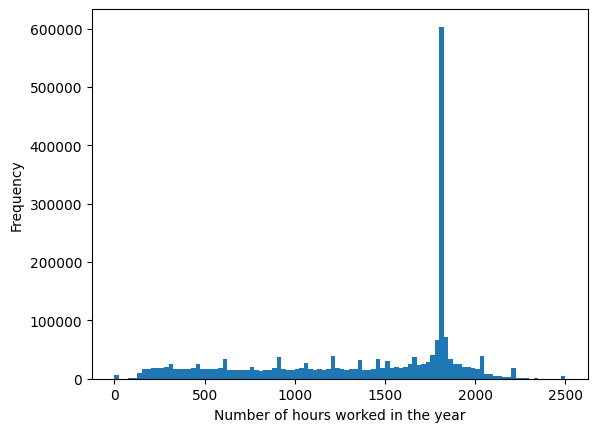

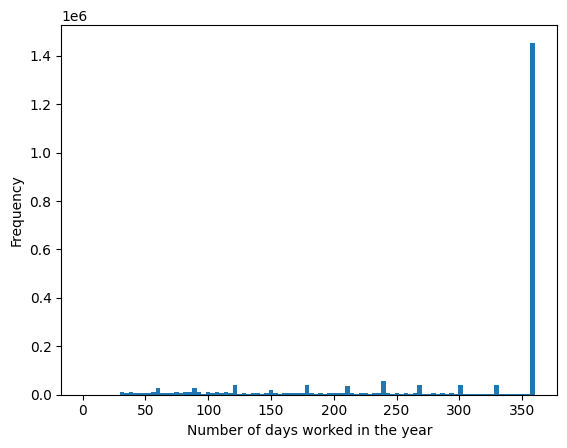

In [45]:
# Plotting the number of hours worked in the year
fig, ax = plt.subplots()
ax.hist(base['NBHEUR'], bins=100, cumulative=False, log=False)
ax.set_xlabel('Number of hours worked in the year')
ax.set_ylabel('Frequency')
plt.show()

# Plotting the number of days worked in the year
fig, ax = plt.subplots()
ax.hist(base['DUREE'], bins=100, cumulative=False, log=False)
ax.set_xlabel('Number of days worked in the year')
ax.set_ylabel('Frequency')
plt.show()

As both graphs above show, the number of hours worked as well as the number of days worked exhibit strong patterns. Regarding the number of days, we see higher frequencies for each multiple of 30 days, indicating that employees employed for less than a full year typically had contracts whose duration was calculated in full months. For the number of hours, a large mode of the data is around 1820 hours, indicating a full-time 35-hours/week typical contracts. We also observe higher frequencies around that value, both below and above, indicating that reported hours can vary slughtly around that value. The same pattern as for the number of days is also exhibited in the data, as we can see higher frequencies corresponding to full-time contracts for a given number of full months spent working. The right-hand tail of the graph exhibit a significant share of the workers whor are doin extra-hours, justifying our focus on that question.

To confirm the strength of the relationship between the duration of the contract and the number o working hours, we estimate the small descriptive model:

$Nb\_hours = \alpha_0 + \beta \times Nb\_days + \epsilon$

In [46]:
# Correlation between the duration of the contract and the number of hours worked
model = sm.ols('NBHEUR ~ DUREE', data=base).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 NBHEUR   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 5.510e+06
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:19:07   Log-Likelihood:            -1.6569e+07
No. Observations:             2315888   AIC:                         3.314e+07
Df Residuals:                 2315886   BIC:                         3.314e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.0958      0.627    -25.664      0.0

The model is almost perfectly linear, the intercept being close to 0, even if significantly different from it. For a full-time job, we would have expected the value of the coefficient $\beta$ to be $\frac{\text{35 hours / week}}{\text{7 days / week}} = \text{5 hours a day}$. The estimated value of 4.72 reflects that there are more employees doing a part-time job than there are working extra-hours.

Lastly, we look at the share of workers doing extra-hours in 2021 among those that are emplyed for the full year. This restriction creates a small bias in the types of contracts that we study, which might slightly alter the quality of our results, but we believe that the study of extra-hours in short-term contracts is a subject of its own which should be studied on the full dataset to get higher identification power and heterogeneities.

In [47]:
# Creating dummy variables indicating that the worker worked more than 35h a week
base["top_extra_hour_tot"] = (base["NBHEUR"] > 1820).astype(int)
base["top_extra_hour_tot_sup35"] = (base["NBHEUR"] > 1855).astype(int)
base[base["DUREE"] == 360].groupby(["top_extra_hour_tot", "top_extra_hour_tot_sup35"]).size()


top_extra_hour_tot  top_extra_hour_tot_sup35
0                   0                           1092029
1                   0                            112317
                    1                            237746
dtype: int64

As we can see, the number of workers doing extra-hours is significant (roughly 360 000 workers in our sample), although it does not represent a very large share of the whole population. Additionnally, among those doing extra-hours, more than two thirds do strictly more than 35 extra hours, which indicate that the phenomenon is quite sizeable for them.

In [48]:
######   # Should probably delete it, is not at its place here
######
######   # Logistic regression of top_extra_hour_tot on DUREE
######   start = time.time()
######   model_logit = sm.logit('top_extra_hour_tot ~ SEXE + TYP_EMPLOI + AGE + CONT_TRAV + CS_N + DEPT_N + DOMEMPL_N + A38', data=base[base["DUREE"] == 360]).fit()
######   print(time.time() - start)
######   print(model_logit.summary())
######

## Doing LASSO regressions on the total number of hours worked

In [49]:
#Import of relevant packages
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix


In [50]:
# Creation of variables
TREFF_to_categ = {0 : "00",
                  1 : "1-9",
                  2 : "10-19",
                  3 : "20-49",
                  4 : "50-99",
                  5 : "100-249",
                  6 : "250+"
}
base['TREFF_N'] = base['TREFF'].replace(TREFF_to_categ)
base['AGE_SQ'] = base['AGE']**2
base["CS_cat"] = base["CS"].astype("string")
base["top_extra_hour_tot"] = (base["NBHEUR"] > 1820).astype(int)

In [51]:
base["NBHEUR_STD"] = (base["NBHEUR"] - np.mean(base["NBHEUR"]))/ np.std(base["NBHEUR"])
base[["NBHEUR", "NBHEUR_STD"]]

,NBHEUR,NBHEUR_STD
0,1821.0,0.781119
1,1572.0,0.343686
2,1825.0,0.788146
3,364.0,-1.778477
4,1764.0,0.680984
...,...,...
2403770,NaN,NaN
2403771,NaN,NaN
2403772,NaN,NaN
2403773,NaN,NaN


The first outcome that we study is the total number of hours worked. For that analysis as well as for the next one, we only focus on contracts that lasted for the whole year, so results on short-term contracts such as CDD should be interpreted with caution.

Our question is to understand whether the sex of the employee plays a role, and if so by how much, once we have controlled for things such as the type of contract, the activity sector, the Socioprofessional category, the size of the firm and the age of the patient.

Here we try the following LASSO model:
$\text{NB_hours} = \alpha_0 + \beta_1 \times \text{SPC} + \beta_2 \times \text{Type_job} + \beta_3 \times \text{Type_Contract} + \beta_4 \times \text{Activity Sector} + \beta_5 \times \text{Département} + \beta_6 \times \text{Business_sector} + \beta_7 \times \text{Age} + \beta_8 \times \text{Age}^2 + \beta_9 \times \text{Sex} + \epsilon$

We are thus minimizing the following program:
$\hat{\beta} = \arg\min_{\beta} \left( \sum_{i=1}^{n} \left( y_i - \mathbf{x}_i^\top \beta \right)^2 + \lambda \sum_{j=1}^{9} |\beta_j| \right)$,
where $\beta$ is the vector of coefficients ($\beta_1$,...,$\beta_9$)

In [ ]:
# Include the explanatory variables in a base for regression
base["CS_cat"] = base["CS"].astype("string")
reg_base = base[base["DUREE"] == 360]


# Creates the base of explanatory variables
X = pd.get_dummies(reg_base[["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_N", "A38", "TREFF_N"]], drop_first=False)
X = X.drop(["TYP_EMPLOI_A",
            "DEPT_91",
            "CONT_TRAV_CDI",
            "CS_N_Ouvriers non qualifiés de type industriel",
            "A38_CG",
            "TREFF_N_20-49"], axis = 1)
X = statsmodels.tools.tools.add_constant(X)
X['AGE'] = base['AGE']
X['AGE_SQ'] = base['AGE']**2
X['SEXE'] = base['SEXE']

#Include the outcome variable
y = reg_base['NBHEUR']

start = time.time()
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8, random_state=20250327)

# Create and fit the Lasso model
lasso_model = Lasso(alpha=0.001)
f = lasso_model.fit(X_train, y_train)

print(time.time() - start)
# Show the cooefficient values
coef_df = pd.DataFrame({'variable': X_train.columns, 'coef': lasso_model.coef_})
coef_df.sort_values("coef")



In [ ]:
## This cell conducts cross-validation on the linear LASSO model on the number of working hours, using standardized explanatory variables.


# Select relevant variables and keep only observations with all informatiosn
all_columns = ["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_cat", "A38", "TREFF_N", "SEXE", "AGE_SQ", "AGE"]
cleaned_base = base[base["DUREE"] == 360][all_columns + ["NBHEUR_STD"]].dropna()
X = cleaned_base[all_columns]
y = cleaned_base['NBHEUR_STD']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20250401)

# Selects and transforms the relevant variables
categorical_columns = ["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_cat", "A38", "TREFF_N"]
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)
numerical_columns = ["SEXE", "AGE_SQ", "AGE"]

preprocessor = make_column_transformer(
    # For categorical columns: impute missing values with the most frequent value and apply OneHotEncoding
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop="if_binary")), categorical_columns),

    # For numerical columns: impute missing values with the median and apply StandardScaler
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_columns)
)

# Doing the lasso regressiion
alphas = np.logspace(np.log10(0.0001), np.log10(10), num=1)  # alpha values to be chosen from by cross-validation
print(alphas)
start = time.time()
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=alphas, max_iter=500, n_jobs = -1, cv= 2)
    ),
)

_ = model.fit(X_train, y_train)
print(time.time() - start)


# Showing all coefficients, beginning with the smaller ones
feature_names = model[:-1].get_feature_names_out()
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs.sort_values("Coefficients")



#### 33122541172.798004
#### 24224453753.549065 (10 iter)
#### 16697898525 (500 iter)

In [ ]:
# Get the optimal value of alpha as per the cross-validation stage
optimal_alpha = model[-1].regressor_.alpha_
print(optimal_alpha)

In [ ]:
coefs[coefs["Coefficients"] != 0 ].sort_values("Coefficients")

In [ ]:
# Display the value of selected coefficients
coefs.plot.barh(figsize=(9, 7))
plt.title("Lasso model, penalization term whosen by cross-validation")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
#Computes the mean absolute error on the test sample
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}


# Display the predicted value against the actual one, to test the quality of the model
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Lasso model")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

As we can see, the LASSO procedure helps to select only a few relevant variables/modality of the categorical variables that are useful to predict the outcome.

## Linear probability model for the extra-hours

We conduct exactly the same analysis for the dummy variable indicating whether the employee works more than the legal working time. Accordingly, the regression analysis is the following:

$\mathbb{1}_{\text{Nb_Hours > 1820}} = \alpha_0 + \beta_1 \times \text{SPC} + \beta_2 \times \text{Type_job} + \beta_3 \times \text{Type_Contract} + \beta_4 \times \text{Activity Sector} + \beta_5 \times \text{Département} + \beta_6 \times \text{Business_sector} + \beta_7 \times \text{Age} + \beta_8 \times \text{Age}^2 + \beta_9 \times \text{Sex} + \epsilon$


In [57]:
## This cell conducts cross-validation on the linear LASSO model, using standardized explanatory variables. None are selected in the end.


# Select relevant variables and keep only observations with all informatiosn
all_columns = ["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_N", "A38_N", "TREFF_N", "SEXE", "AGE_SQ", "AGE"]
cleaned_base = base[base["DUREE"] == 360][all_columns + ["top_extra_hour_tot"]].dropna()
X = cleaned_base[all_columns]
y = cleaned_base['top_extra_hour_tot']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20250328)

# Selects and transforms the relevant variables
categorical_columns = ["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_N", "A38_N", "TREFF_N"]
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)
numerical_columns = ["SEXE", "AGE_SQ", "AGE"]

preprocessor = make_column_transformer(
    # For categorical columns: impute missing values with the most frequent value and apply OneHotEncoding
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop="if_binary")), categorical_columns),

    # For numerical columns: impute missing values with the median and apply StandardScaler
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_columns)
)

# Do the lasso regressiion with a linear model
alphas = np.logspace(np.log10(0.0001), np.log10(10), num=6)  # alpha values to be chosen from by cross-validation

start = time.time()
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=alphas, max_iter=1000, n_jobs = -1, cv= 3)
    ),
)

_ = model.fit(X_train, y_train)
print(time.time() - start)

212.94489288330078


,Coefficients
pipeline-1__A38_FZ,-0.318209
pipeline-1__A38_IZ,-0.242895
pipeline-1__A38_RZ,-0.176544
pipeline-1__A38_TZ,-0.158846
pipeline-1__CS_cat_31.0,-0.150268
...,...
pipeline-1__CS_cat_48.0,0.102730
pipeline-1__CS_cat_69.0,0.123255
pipeline-1__CONT_TRAV_TTP,0.183450
pipeline-1__CS_cat_53.0,0.190178


In [58]:
# Get the optimal value of alpha as per the cross-validation stage
optimal_alpha = model[-1].regressor_.alpha_
print("The optimal value of alphe selected by cross-validation is :", optimal_alpha)

# Showing all coefficients, beginning with the smaller ones
feature_names = model[:-1].get_feature_names_out()
feature_names = [name.split("__")[-1] for name in feature_names]
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs[coefs["Coefficients"] != 0 ].sort_values("Coefficients")

0.0001


,Coefficients
pipeline-1__A38_FZ,-0.318209
pipeline-1__A38_IZ,-0.242895
pipeline-1__A38_RZ,-0.176544
pipeline-1__A38_TZ,-0.158846
pipeline-1__CS_cat_31.0,-0.150268
...,...
pipeline-1__CS_cat_48.0,0.102730
pipeline-1__CS_cat_69.0,0.123255
pipeline-1__CONT_TRAV_TTP,0.183450
pipeline-1__CS_cat_53.0,0.190178


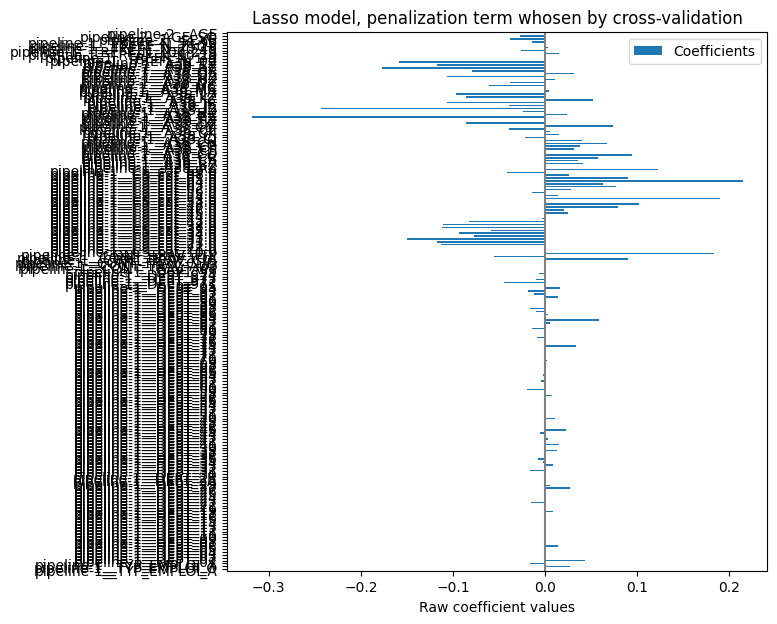

In [59]:
# Display the value of selected coefficients
coefs.plot.barh(figsize=(9, 7))
plt.title("Lasso model, penalization term chosen by cross-validation")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

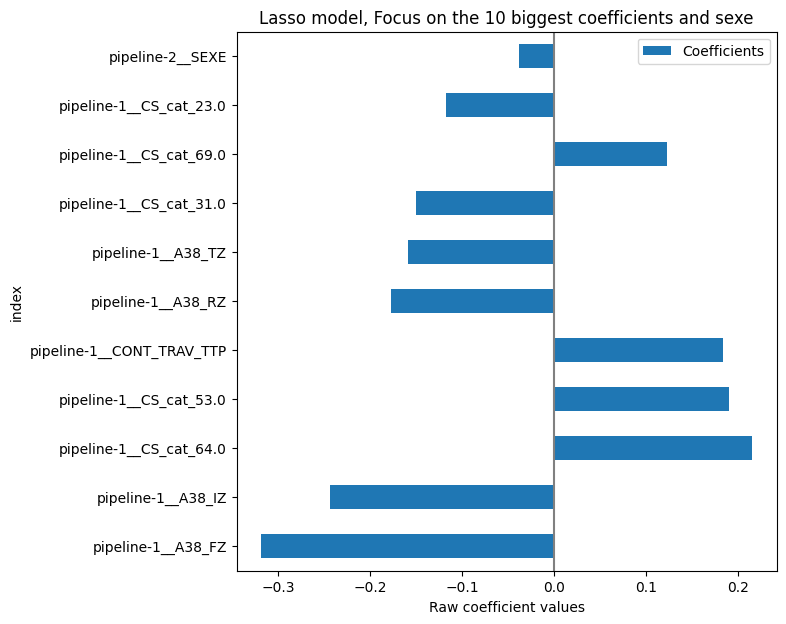

In [94]:
# Showing all coefficients, beginning with the smaller ones
feature_names = model[:-1].get_feature_names_out()
feature_names = [name.split("__")[-1] for name in feature_names]

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs = coefs.reset_index()
coefs["abs_coefs"] = coefs["Coefficients"].abs()
large_coefs = coefs.sort_values("abs_coefs", ascending = False).head(10)
large_coefs = pd.concat([large_coefs, coefs[coefs["index"] == "SEXE"]])
large_coefs

# Display the value of selected coefficients
large_coefs.plot.barh(x='index', y='Coefficients', figsize=(9, 7))
plt.title("Lasso model, Focus on the 10 biggest coefficients and sex")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [69]:
#Computes the mean absolute error on the test sample
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
print("MedAE on training set", f"{mae_train:.2f}")
print("MedAE on testing set", f"{mae_test:.2f}")

MedAE on training set 0.26
MedAE on testing set 0.26


In [67]:
#Computes the mean absolute error on the test sample
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
print("MedAE on training set", f"{mae_train:.2f}")
print("MedAE on testing set", f"{mae_test:.2f}")

# Here we make the simplifying assumption that we predict 1 if the linear probability estimated is superior to 0.5, and compute the consfusion matrix
y_pred_binary = (y_pred > 0.5).astype(int)
pd.DataFrame(confusion_matrix(y_test, y_pred_binary))


,0,1
0,267158,4926
1,78610,7516


## Logistic regressions with L1 penalization

In the previous sections, we trained linear models on the number of hours and on the dummy variable that employees conduct extra hours. In this section we try an alternative model for the binary variable, the logistic one, also including the L1 penalizaation. The idea is to test whether the same predictive variables are selected using both modelisation, comfirming their importance for the explanation of extra-hours worked;

Formally, the model we estimate in this section is the following:

$\hat{\beta} = \arg\min_{\beta} \left( - \sum_{i=1}^{n} \left[ y_i \log \left( \sigma(\mathbf{x}_i^\top \beta) \right) + (1 - y_i) \log \left( 1 - \sigma(\mathbf{x}_i^\top \beta) \right) \right] + \lambda \sum_{j=1}^{p} |\beta_j| \right)$

This is just a modification of the standard optimization problem of a logistic model ($\sigma(z) = \frac{1}{1 + e^{-z}}$ is the logistic function), with the first part of the sum designating the cross-entropy and the second part being the standard L1 penalization.

In [56]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
## This cell conducts cross-validation on the logistic LASSO model, using standardized explanatory variables


# Select relevant variables and keep only observations with all informatiosn
all_columns = ["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_N", "A38_N", "TREFF_N", "SEXE", "AGE_SQ", "AGE"]
cleaned_base = base[base["DUREE"] == 360][all_columns + ["top_extra_hour_tot"]].dropna()

X = cleaned_base[all_columns]
y = cleaned_base['top_extra_hour_tot']
y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20250328)

# Selects and transforms the relevant variables
categorical_columns = ["TYP_EMPLOI", "DEPT", "CONT_TRAV", "CS_N", "A38_N", "TREFF_N"]
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str)
numerical_columns = ["SEXE", "AGE_SQ", "AGE"]

preprocessor = make_column_transformer(
    # For categorical columns: impute missing values with the most frequent value and apply OneHotEncoding
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop="if_binary")), categorical_columns),

    # For numerical columns: impute missing values with the median and apply StandardScaler
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_columns)
)

# Conduct a lasso regressiion
alphas = np.logspace(np.log10(0.0001), np.log10(10), num=6)  # alpha values to be chosen from by cross-validation

start = time.time()
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor= LogisticRegressionCV(Cs=alphas, penalty = "l1", solver = "liblinear",  max_iter=1000, n_jobs = -1, cv= 3)
    ),
)

_ = model.fit(X_train, y_train)
print(time.time() - start)


# Showing all coefficients, beginning with the bigger ones
feature_names = model[:-1].get_feature_names_out()
feature_names = [name.split("__")[-1] for name in feature_names]
coefs = pd.DataFrame(
    model[-1].regressor_.coef_[0],
    columns=["Coefficients"],
    index=feature_names,
)
coefs.sort_values("Coefficients")

In [ ]:
# Showing all coefficients, beginning with the bigger ones
feature_names = model[:-1].get_feature_names_out()
feature_names = [name.split("__")[-1] for name in feature_names]
coefs = pd.DataFrame(
    model[-1].regressor_.coef_[0],
    columns=["Coefficients"],
    index=feature_names,
)
coefs[coefs["Coefficients"] != 0].sort_values("Coefficients")

,Coefficients
pipeline-1__A38_FZ,-2.727289
pipeline-1__A38_IZ,-1.810174
pipeline-1__CONT_TRAV_TOA,-1.761791
pipeline-1__CS_cat_31.0,-1.717088
pipeline-1__CS_cat_22.0,-1.514526
...,...
pipeline-1__CS_cat_48.0,0.543363
pipeline-1__CONT_TRAV_TTP,0.778458
pipeline-1__CS_cat_53.0,0.835496
pipeline-1__CS_cat_69.0,0.839247


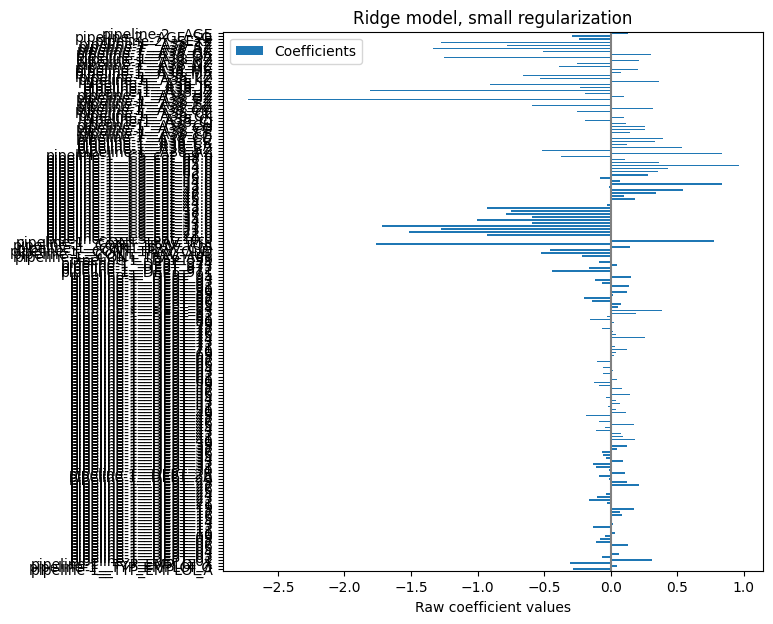

In [ ]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
# Showing all coefficients, beginning with the smaller ones
feature_names = model[:-1].get_feature_names_out()
feature_names = [name.split("__")[-1] for name in feature_names]

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs = coefs.reset_index()
coefs["abs_coefs"] = coefs["Coefficients"].abs()
large_coefs = coefs.sort_values("abs_coefs", ascending = False).head(10)
large_coefs = pd.concat([large_coefs, coefs[coefs["index"] == "SEXE"]])
large_coefs

# Display the value of selected coefficients
large_coefs.plot.barh(x='index', y='Coefficients', figsize=(9, 7))
plt.title("Lasso model, Focus on the 10 biggest coefficients and sex")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
#Computes the mean absolute error on the test sample
mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
print("MedAE on training set", f"{mae_train:.2f}")
print("MedAE on testing set", f"{mae_test:.2f}")


In [ ]:
# Disply the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))